In [1]:
########### IMPORT ###########
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()


Node 974350b8-c62b-4cd5-aab2-1fa81fa4e35f

In [2]:
from init import init
from run import run
from idle import idle

import numpy as np
import math

import cv2
from cv2 import aruco
import numpy as np
from matplotlib import pyplot as plt
import time

from init import init
#fonction Sophie
#from findPath import findPath

#fonction Liandro
from camera import live_cam

# State Machine Explanation

* IDLE -> INIT: Press on the middle button of the robot
* INIT -> RUN: Automatic when init is done
* INIT -> IDLE: Automatic if Camera is not detected
* RUN -> IDLE: Automatic when the goal is reach

In [3]:
########### MAIN ###########
async def main():
    x_init, expanded_obs, trajectory_points, cam, corner_coordinates = init()
    print("INIT STATE: ", x_init)
    print("x_init : ",x_init)
    print("expanded_obs : ",expanded_obs)
    print("trajectory_points : ",trajectory_points)
    print("corner_coordinates : ",corner_coordinates)
    if x_init is not None and np.any(x_init):
        await run(x_init, expanded_obs, trajectory_points, cam, corner_coordinates,node,client)
        print("RUNNING")
    else:
        print("ERROR: CAMERA IS NOT DETECTED")
    idle()

# CODE

Impossible to find the 4 corners !!
corner_coordinates OK :  [[125, 18], [551, 31], [591, 458], [61, 441]]
position goal OK:  [70, 643]
pos_goal :  [70, 643]
pos_obstacle :  [[[0, 729], [68, 730], [70, 799]], [[582, 607], [597, 703], [541, 724], [526, 627]], [[231, 280], [175, 336], [270, 399], [297, 373]], [[449, 251], [437, 308], [472, 363], [542, 321], [507, 263]]]
pos_thymio :  [766, 397, -135.0]


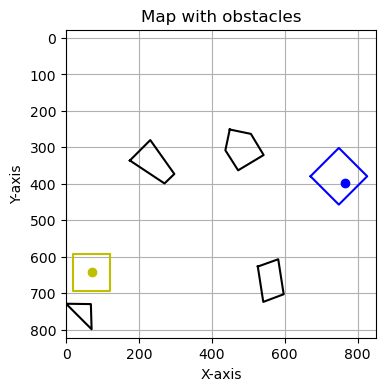

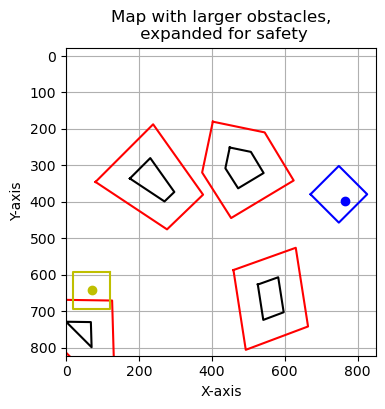

Obstacle  0
[(-147.02138040452027, 666.8314333378654), (134.3499163102407, 948.2027300526264), (126.31073640410467, 670.8510232909334)]
Obstacle  1
[(459.1277508352574, 587.1712229274717), (492.9807445403763, 806.0872488872404), (663.824983301361, 742.0206593518711), (630.0894835944677, 526.1134612277536)]
Obstacle  2
[(80.6930951298325, 345.4540911277818), (276.95017740412027, 475.6035246359937), (375.8213677851535, 380.3942301949988), (238.81183839089246, 187.33534786672186)]
Obstacle  3
[(402.6047230431519, 180.13024796081416), (373.24778504601545, 319.57570344721256), (452.75629411465053, 444.5176462693533), (624.449737834185, 341.5015800376326), (544.8271502310234, 209.555577723822)]
Nodes, grouped by start-obs1-obs2-...-goal, are : 
[[0], [1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15, 16], [17]]


Associated vertices are : 
( 766 , 397 )
( -147.02 , 666.83 )
( 134.35 , 948.2 )
( 126.31 , 670.85 )
( 459.13 , 587.17 )
( 492.98 , 806.09 )
( 663.82 , 742.02 )
( 630.09 , 52

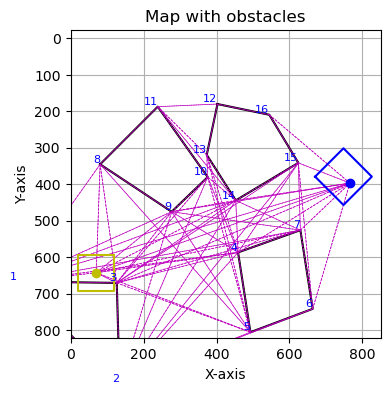

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


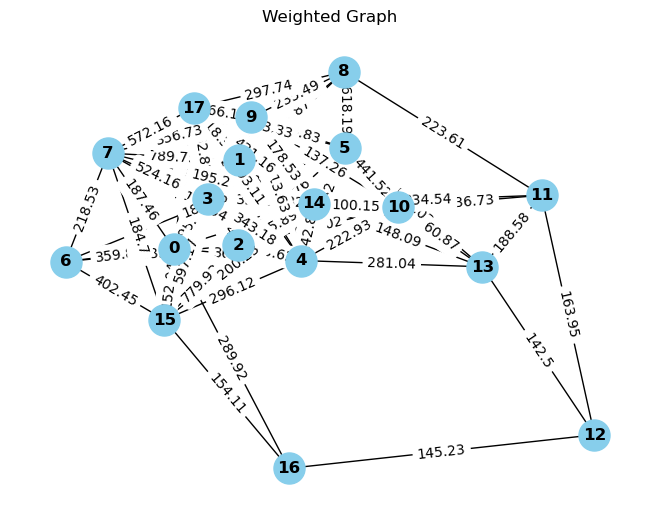

Path nodes : [0, 17] 
Path cost : 738.2
[[766, 397], [70, 643]]
[738.195096163609] 
 [-295.53413299164754]

INIT STATE:  [[ 766.]
 [ 397.]
 [-135.]]
x_init :  [[ 766.]
 [ 397.]
 [-135.]]
expanded_obs :  [[(-147.02138040452027, 666.8314333378654), (134.3499163102407, 948.2027300526264), (126.31073640410467, 670.8510232909334)], [(459.1277508352574, 587.1712229274717), (492.9807445403763, 806.0872488872404), (663.824983301361, 742.0206593518711), (630.0894835944677, 526.1134612277536)], [(80.6930951298325, 345.4540911277818), (276.95017740412027, 475.6035246359937), (375.8213677851535, 380.3942301949988), (238.81183839089246, 187.33534786672186)], [(402.6047230431519, 180.13024796081416), (373.24778504601545, 319.57570344721256), (452.75629411465053, 444.5176462693533), (624.449737834185, 341.5015800376326), (544.8271502310234, 209.555577723822)]]
trajectory_points :  [[70, 643]]
corner_coordinates :  [[125, 18], [551, 31], [591, 458], [61, 441]]
-----------------------------------------

In [ ]:
await main()

In [ ]:
#unlock the robot:
await(node.unlock())